# Topic Extraction

In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

Load documents as strings into a Python-list.

In [20]:
n_samples = 2000
n_features = 1000
n_topics = 20
n_top_words = 20

In [21]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

## Loading data

In [22]:
import os
import glob
import numpy as np

list_of_files = glob.glob('../RemarksAndStatement/text_files_with_punctuation/*.txt')

data_samples=[]
for fileName in list_of_files:
    fin = open( fileName, "r" )
    s = fin.read()
    fin.close()
    data_samples.append(s)

## Creating TF-IDF Matrix

In [23]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.6, min_df=20,stop_words='english',decode_error='ignore')
tfidf = tfidf_vectorizer.fit_transform(data_samples)

In [24]:
np.shape(tfidf)

(435, 821)

## Creating TF Matrix

In [25]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=10, max_features=2000, stop_words='english',decode_error='ignore')
tf = tf_vectorizer.fit_transform(data_samples)

# SVD

* `svd_`: 0.95, 2
* `svd2_`: 0.8,10

In [26]:
import numpy as np

U, s, V = np.linalg.svd(tfidf.todense(), full_matrices=True)

In [27]:
np.savetxt("svd2_U.txt",U)

In [28]:
np.savetxt("svd2_s.txt",s)

In [29]:
np.savetxt("svd2_V.txt",V[:,range(20)],fmt='%.4e')

In [30]:
np.shape(V[:,range(20)])

(821, 20)

In [31]:
print np.shape(U)
print np.shape(V)
print np.shape(s)

(435, 435)
(821, 821)
(435,)


(0, 10)

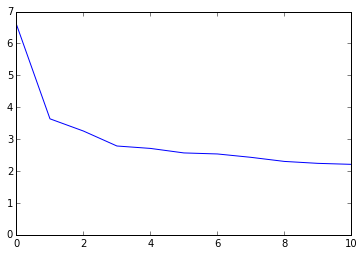

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(s)
plt.xlim(0,10)

In [33]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [34]:
f=open("svd2_words.txt",'w')
f.write("\n".join(tfidf_feature_names))
f.close()

# NMF

In [35]:
print "Fitting the NMF model with tf-idf features," "n_samples=%d and n_features=%d..." % (n_samples, n_features)
nmf = NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)

Fitting the NMF model with tf-idf features,n_samples=2000 and n_features=1000...


Topics in NMF model

In [36]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topic #0:
people country america americans american new need time campaign world nation economy years work great jobs let families today government
Topic #1:
iran nuclear deal agreement iranian obama negotiations sanctions president regime program arms region dangerous world weapons bad east allies administration
Topic #2:
texas houston republican 2016 sen gov nomination following field statement race uni released welcome governor presidential planned today friend stronger
Topic #3:
thank campaign support good home wife really time welcome watch ll grateful bad victory spend able want democratic works strong
Topic #4:
trump donald mr issued statement following campaign candidate democratic party border response country violence presidential facing republican women sen office
Topic #5:
israel peace isis friends united international security anti states terrorist people world terrorists east community region iran nations let military
Topic #6:
court supreme marriage decision justice obam

In [37]:
H = nmf.components_.T;
W = nmf.fit_transform(tfidf);
H = nmf.components_;